# Training Models

In [1]:
# Imports required packages
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, LogisticRegression
from sklearn.svm import LinearSVC, SVC

import matplotlib.pyplot as plt

## Linear Regression

### Linear Regression Model

$$\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

where 
- ŷ is the predicted value.
- n is the number of features.
- x<sub>i</sub> is the ith feature value.
- θ<sub>j</sub> is the j<sup>th</sup> model parameter (including the bias term θ<sub>0</sub> and the feature weights θ<sub>1</sub>, θ<sub>2</sub>, ⋯, θ<sub>n</sub>).

This can be written much more concisely using a vectorized form as shown below.

$$\hat{y} = h_\theta(x) = \theta.x$$

where
- θ is the model’s parameter vector, containing the bias term θ<sub>0</sub> and the feature weights θ<sub>1</sub> to θ<sub>n</sub>
- x is the instance’s feature vector, containing x<sub>0</sub> to x<sub>n</sub>, with x<sub>0</sub> always equal to 1
- θ·x is the dot product of the vectors θ and x, which is of course equal to θ<sub>0</sub>x<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ... + θ<sub>n</sub>x<sub>n</sub>
- h<sub>θ</sub> is the hypothesis function, using the model parameters θ

### Measuring Model Performance

$$Root Mean Squared Error (RMSE) = \sqrt{Mean Squared Error (MSE)}$$

$$MSE(X, h_0) = \frac{1}{m}\sum_{i=1}^{n}(\theta^Tx^{(i)} - y^{(i)})^2$$

**Normal Equation**

Normal Equation to find the value of θ that minimizes the cost function, there is a closed-form solution.

$$\hat{θ} = {(X^TX)}^{-1}X^Ty$$

where
- $\hat{θ}$ is the value of θ that minimizes the cost function
- y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

**Testing Normal Equation Model**

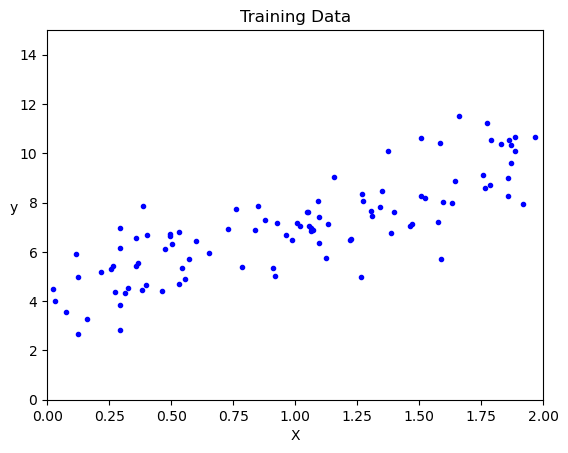

In [2]:
# Generating data set

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plots the training data

plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.title("Training Data")
plt.show()

In [2]:
# Creates additional feature values for x0 for each instance
X_new = np.c_[np.ones((100, 1)), X]

# Computing θ values
theta = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)

# Shows θ values
print(theta)

[[4.27076514]
 [3.00482905]]


In [3]:
# Making predictions using theta

X_test = np.array([[0], [2]])               # Creates two data points
X_test_new = np.c_[np.ones((2, 1)), X_test] # Creates additional feature values for x0 for each instance

predictions = X_test_new.dot(theta)
print(predictions)

[[ 4.27076514]
 [10.28042323]]


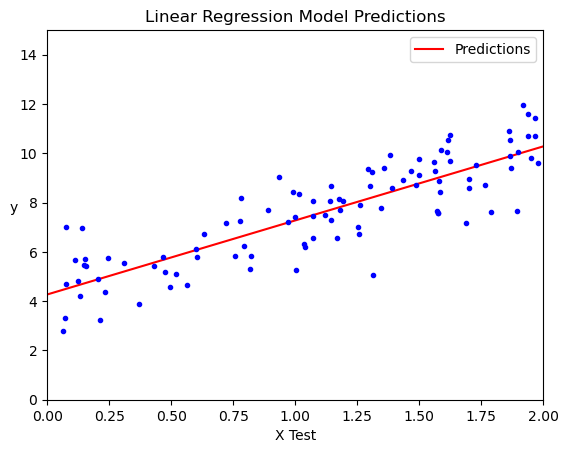

In [4]:
# Plots the predictions

plt.plot(X_test, predictions, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X Test")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.title("Linear Regression Model Predictions")
plt.show()

**Performing Linear Regression using Scikit-Learn framework**

In [5]:
lr_model = LinearRegression()
lr_model.fit(X, y)

print("Linear Regression Model Parameters: {} (intercept), {} (coefficient)".format(
    lr_model.intercept_, lr_model.coef_))


Linear Regression Model Parameters: [4.27076514] (intercept), [[3.00482905]] (coefficient)


In [6]:
# Making predictions using Linear Regression model

lr_model_predictions = lr_model.predict(X_test)
print("Linear Model Predictions:", lr_model_predictions)

Linear Model Predictions: [[ 4.27076514]
 [10.28042323]]


In [7]:
# Linear Regression is based on Least Square (numpy.linalg.lstsq)
# and can be called directly as shown below.

theta_svd, residuals, rank, s = np.linalg.lstsq(X_new, y, rcond=1e-6)
print(theta_svd)

[[4.27076514]
 [3.00482905]]


## Gradient Descent

### Batch Gradient Descent

In [10]:
# Sets learning rate
eta = 0.1

# Seting fix number of iternations
n_iterations = 1000

# Setting number of training examples to 100
m = 100

# Initializes model parameters randomly
theta = np.random.randn(2, 1)

for i in range(n_iterations):
    gradients = 2/m * X_new.T.dot(X_new.dot(theta) - y)
    theta = theta - eta * gradients

# prints theta values
print(theta)

[[4.27076514]
 [3.00482905]]


### Stochastic Gradient Descent (SGD)

In [12]:
# <Place holder>

## Polynomial Regression

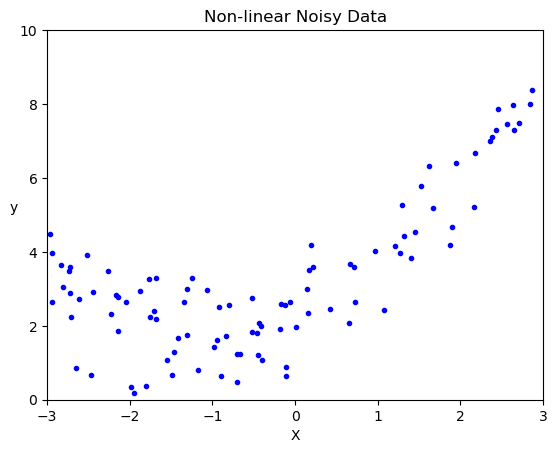

In [3]:
# Generating some non-linear data

m = 100                                         # number of training instances

X = 6 * np.random.rand(m, 1) - 3                # Feature values
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # Generates target

# Plots the data

plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Non-linear Noisy Data")
plt.show()

As straight line won't fit this data properly, use polynomial feature to transform the training data by adding square of each feature in the training data set as new feature.

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [24]:
# Shows the transformed training data set

display(
    pd.DataFrame(
        {"X": X.reshape(-1), "X_poly": X_poly[:,1], "y": y.reshape(-1)}
    ).head()
)

,X,X_poly,y
0,-1.312390,1.722367,2.989483
1,0.194835,0.037961,4.193960
2,-0.801244,0.641993,2.559724
3,-1.764847,3.114684,3.268843
4,-2.803998,7.862404,3.056533


In [27]:
# Now, fits a linear regression model to the training data

lr_model = LinearRegression()
lr_model.fit(X_poly, y)

# Prints model parameters
print("Intercept:", lr_model.intercept_, "Coefficients:", lr_model.coef_)

Intercept: [2.20624461] Coefficients: [[0.94364897 0.44045415]]


Intercept and coefficient for term $x^2$ are very close to parameters that were used to generate target. Intercept was 2 + Gaussian noise, and coefficient for $x^2$ was 0.5

In [1]:
# <Place holder to plot fitted model over data>

## Learning Curves

In [33]:
def plot_learning_curves(model, X, y):
    """
    Plots model's prediction performance on traning and validation data
    """
    
    # Splits data into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # Lists to store training and validation error
    train_errors, val_errors = [], []
    
    # Iterates through different size of training set
    for m in range(1, len(X_train)):
        # Fits the model on the specified size of the training data
        model.fit(X_train[:m], y_train[:m])
        
        # Performs prediction on the training set the model was trained on
        y_train_predict = model.predict(X_train[:m])
        
        # Performs the prediction on the validation data
        y_val_predict = model.predict(X_val)
        
        # Appends the calculated MSE for both training and validation error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    # Plots training error vs validation error as a function of training data size
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve")
    plt.show()

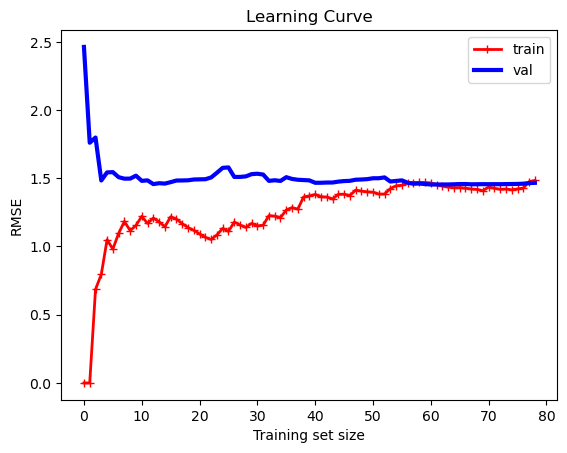

In [34]:
# Initializes Linear Regression model and plots the learning curve

lr_model = LinearRegression()
plot_learning_curves(lr_model, X, y)

Analysing the above Learning Curve of Linear Regression model:

- Training error continued increasing with the increase of training data size till reaching a plateau
- Validation error continued descreasing with the increase of training data size till reaching a plateau
- Both curves have reached plateau as the model has underfitted the training data leaving options such as 
    - Considering relative complex model to use
    - Creating better features

## Regularized Linear Models

### Ridge Regression

In [39]:
# Instantiate Ridge Regression model
ridge_reg_model = Ridge(alpha=1, solver="cholesky")

# Fits the model
ridge_reg_model.fit(X, y)

# Performs prediction
print("Ridge Regressor Prediction:", ridge_reg_model.predict([[1.5]]))

Ridge Regressor Prediction: [[4.74185618]]


In [41]:
# Regularization in SGD Regression

# Instantiate SGD Regressor model
sgd_reg_model = SGDRegressor(penalty="l2")

# Fits the model
sgd_reg_model.fit(X, y.ravel())

print("SGD Regressor Prediction:", sgd_reg_model.predict([[1.5]]))

SGD Regressor Prediction: [4.72404269]


### Early Stopping

In [26]:
# Splitting data into tran and test set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Flattens targets to 1D array
y_train = y_train.ravel()
y_val = y_val.ravel()

In [12]:
# Sets up pipeline to prepare data

poly_scaler_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaling", StandardScaler())])

In [14]:
# First add polynomial features and then scales feature values

X_train_poly_scaled = poly_scaler_pipeline.fit_transform(X_train)
X_val_poly_scaled = poly_scaler_pipeline.transform(X_val)

In [17]:
# Prints the shape of train set having polynomial features

print(X_train_poly_scaled.shape)

(80, 90)


In [65]:
# Instantiate SGD Regressor class

#sgd_reg_model = SGDRegressor(penalty=None, max_iter=1, tol=-np.infty, 
#    learning_rate="constant", eta0=0.0005, warm_start=True)

sgd_reg_model = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
                             
min_val_error = float("inf")  # Sets error value to positive infinite
best_epoch = None
best_model = None
train_errors = []
val_errors = []
n_epochs = 500

# Starts training over epoch
print("Training and prediction are in progress ", end="")
for epoch in range(n_epochs):
    # Continues learning over iterations
    #sgd_reg_model.fit(X_train_poly_scaled, y_train)
    sgd_reg_model.partial_fit(X_train_poly_scaled, y_train)
    
    # Performs prediction over train data
    y_train_predictions = sgd_reg_model.predict(X_train_poly_scaled)

    # Performs prediction over validation data
    y_val_predictions = sgd_reg_model.predict(X_val_poly_scaled)
    
    # Calculates error
    train_error = mean_squared_error(y_train, y_train_predictions, squared=False)
    val_error = mean_squared_error(y_val, y_val_predictions, squared=False)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    #if validation error is less than on the error from the previous epoch, then
    # error, best epoch and best model were stored for reference
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg_model)
    
    print(".", end="")
    
print("ended.")

Training and prediction are in progress ....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................ended.


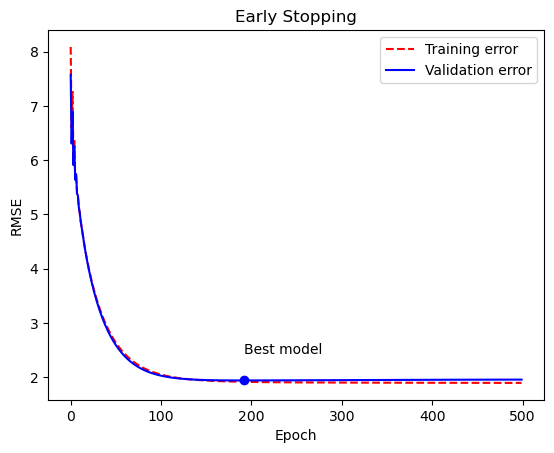

In [76]:
best_epoch = np.argmin(val_errors)
plt.plot(train_errors, "r--", label="Training error")
plt.plot(val_errors, "b-", label="Validation error")
#plt.axis([0, n_epochs, 0, 3.5])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.plot(best_epoch, min_val_error, "bo")
plt.annotate("Best model", xy=(best_epoch, min_val_error+0.5))
plt.legend()
plt.title("Early Stopping")
plt.show()

## Logistic Regression

Building a classifier to detect the Iris virginica type based only on the petal width feature

In [3]:
# Loads Iris data
iris = datasets.load_iris()

# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# Checks the shape of the data
print(iris.data.shape)

(150, 4)


In [5]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Sets training set extracting only the petal width as feature
X = iris["data"][:, 3:]

# And, sets target with True if array element is 2 
# (as 2 is considered as label for virginica, else sets target as False
y = iris["target"] == 2

# Sets y as integer (0 for False and 1 for True)
y = y.astype(int)

In [100]:
# Instantiates Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

LogisticRegression()

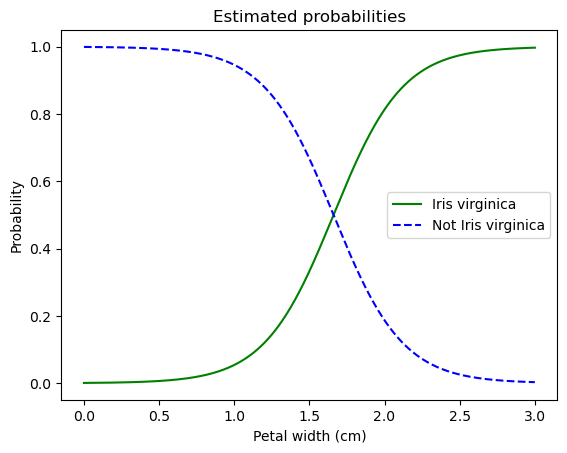

In [106]:
# Creates synthetic data to estimate probabilities 
# for flowers with petal widths varying from 0 cm to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Estimates probabilities for width of the flower to be of Virginica
y_proba = log_reg_model.predict_proba(X_new)

# Now, plots the probability estimation for Virgivica flower
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")

# Optional, but plots probability estimation for Non-Virginica flower
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.title("Estimated probabilities")
plt.show()

### Softmax Regression or Multinomial Logistic Regression

In [119]:
# Sets training set extracting only petal length and width as feature
X = iris["data"][:, (2,3)]

y = iris["target"]    # Sets target

# Initializes the model
softmax_reg_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

# Fits the model
softmax_reg_model.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [120]:
# Performs test on instance with petal length and width 
# with 5 cm. and 2 cm. respectively, and prints the prediction
print(softmax_reg_model.predict([[5, 2]]))

# Prints the prediction probabilities across all three classes
print(softmax_reg_model.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


## Support Vector Machines (SVM)

### Linear SVM Classifier

In [109]:
# Sets training set extracting only petal length and width as feature
X = iris["data"][:, (2,3)]

# And, sets target with True if array element is 2 
# (as 2 is considered as label for virginica, else sets target as False
y = iris["target"] == 2

# Sets y as float (0.0 for False and 1.0 for True)
y = y.astype(float)

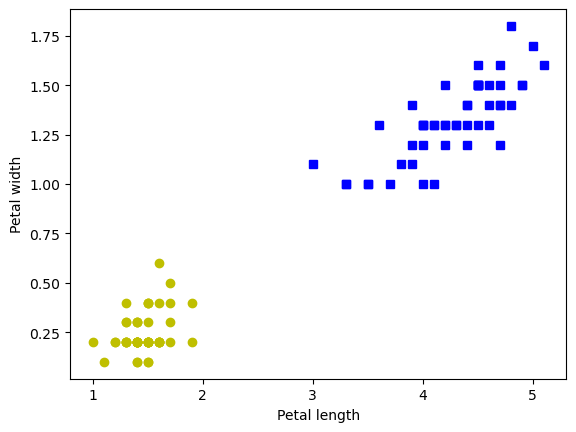

In [128]:
plt.plot(X[:,0][y==1.0], X[:,1][y==1.0], "bs")
plt.plot(X[:,0][y==0.0], X[:,1][y==0.0], "yo")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [118]:
# Creates pipeline to scale data and to train the model

linear_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    # or SVC(C=1, kernel="linear")
    # or SGDClassifier(loss="hinge", alpha=1/(m*C)) for online and/or out-of-core training
])

# Fits the pipeline
linear_svm_pipeline.fit(X, y)

# Performs prediction
print(linear_svm_pipeline.predict([[5.5, 1.7]]))

[1.]


### Non-linear SVM Classification

In [10]:
# Creates data for binary classification from a toy dataset 
# in which the data points are shaped as two interleaving half circles
X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

In [143]:
# Creates pipeline to create polynomial feature, scale data and then to train the model
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), 
    ("std_scaler", StandardScaler()), 
    ("linear_svm_clf", LinearSVC(C=10, max_iter=10_000, loss="hinge"))
])

# Fits the pipeline
poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('linear_svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=10000))])

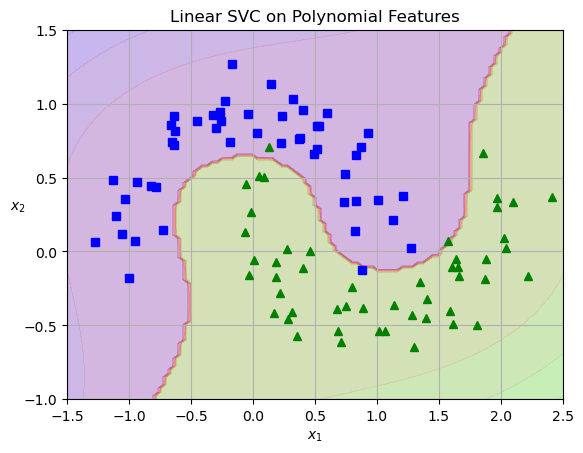

In [150]:
axes = [-1.5, 2.5, -1, 1.5]

# Plots the data

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.axis(axes)
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)

# Plots the predictions

x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_test = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_svm_clf.predict(X_test).reshape(x0.shape)
y_decision = poly_svm_clf.decision_function(X_test).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.title("Linear SVC on Polynomial Features")
plt.show()

### Polynomial Kernel

In [149]:
# Creates pipeline to scale data and then to train the model
poly_kernel_svm_clf = Pipeline([
    ("std_scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

# Fits the model
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

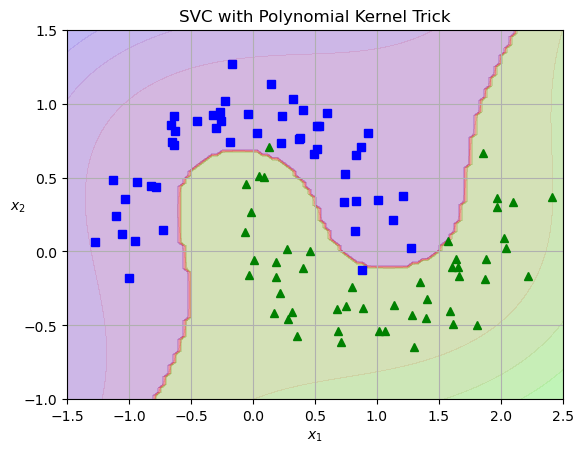

In [151]:
axes = [-1.5, 2.5, -1, 1.5]

# Plots the data

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.axis(axes)
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)

# Plots the predictions

x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_test = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_kernel_svm_clf.predict(X_test).reshape(x0.shape)
y_decision = poly_kernel_svm_clf.decision_function(X_test).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.title("SVC with Polynomial Kernel Trick")
plt.show()

### Gaussian Radial Basis Function (RBF) Kernel

In [11]:
# Creates pipeline to scale data and then to train the model
rbf_kernel_svm_clf = Pipeline([
    ("std_scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])

# Fits the model
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

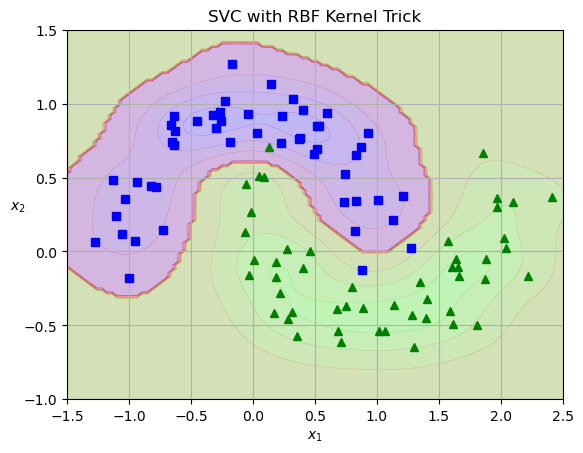

In [12]:
axes = [-1.5, 2.5, -1, 1.5]

# Plots the data

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.axis(axes)
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)

# Plots the predictions

x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_test = np.c_[x0.ravel(), x1.ravel()]
y_pred = rbf_kernel_svm_clf.predict(X_test).reshape(x0.shape)
y_decision = rbf_kernel_svm_clf.decision_function(X_test).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.title("SVC with RBF Kernel Trick")
plt.show()